In [24]:
# Point to the location of the project
import sys
sys.path.append('..')

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# Import DataManager and auxiliary functions
from src.DataManager import DataManager
from src.DataManager import auxillary_functions

In [26]:
# Load the data from MasterSheet.xlsx
data_path = '../data/MasterSheet.xlsx'
dm = DataManager(file_path=data_path)

# Display available sheet names and column titles
print("Available sheets:")
dm.show_sheetnames()
print("\nColumn titles:")
dm.show_column_titles()


Available sheets:
['SuperficialDensity', 'IntermediateDensity', 'DeepDensity', 'SuperficialDiving', 'IntermediateDiving']

Column titles:
['ExpDate', 'ExpNum', 'Replicate', 'ImageName', 'Age', 'Genotype', 'Eye', 'Quadrant', 'Magnification', 'Mouse ID', 'KneeSup', 'KneeDeep', 'KneeInt']


In [27]:
# Check the unique genotypes in the data
print("Unique genotypes:")
print(dm.id_sheet['Genotype'].unique())
print("\nUnique ages:")
print(dm.id_sheet['Age'].unique())


Unique genotypes:
['WT' 'B2']

Unique ages:
[ 5  6  7  8  9 10 11 12 13 14]


In [28]:
# Extract wildtype (WT) data
wt_df = dm.get_ID_df_with_category(genotype='WT')
print(f"Wildtype (WT) samples: {len(wt_df)}")

# Extract B2 knockout data
b2_df = dm.get_ID_df_with_category(genotype='B2')
print(f"B2 knockout samples: {len(b2_df)}")


Wildtype (WT) samples: 118
B2 knockout samples: 131


In [29]:
# Function to extract central (index 5) and peripheral (index 20) values from all layers
def extract_central_peripheral_all_layers(dm, genotype, sheet_names):
    """
    Extract central and peripheral vessel density values for a given genotype from all layers.
    
    Parameters:
    -----------
    dm : DataManager
        DataManager object with loaded data
    genotype : str
        Genotype to filter (e.g., 'WT' or 'B2')
    sheet_names : list
        List of sheet names to extract data from (e.g., ['SuperficialDensity', 'IntermediateDensity', 'DeepDensity'])
        
    Returns:
    --------
    pd.DataFrame
        DataFrame with columns: Age, Genotype, Layer, Central, Peripheral
    """
    # Get filtered dataframe for the genotype
    filtered_df = dm.get_ID_df_with_category(genotype=genotype)
    
    if filtered_df is None or filtered_df.empty:
        print(f"No data found for genotype: {genotype}")
        return pd.DataFrame()
    
    # Extract data for each layer
    all_results = []
    
    for sheet_name in sheet_names:
        if sheet_name not in dm.density_dict:
            print(f"Warning: Sheet {sheet_name} not found, skipping...")
            continue
            
        # Extract layer name (remove 'Density' suffix)
        layer_name = sheet_name.replace('Density', '')
        
        # Get the raster data for this sheet
        raster_data = dm.density_dict[sheet_name]
        
        # Convert to numpy array for easier indexing
        raster_array = raster_data.to_numpy()
        
        # Extract data for each sample
        for idx in filtered_df.index:
            age = filtered_df.loc[idx, 'Age']
            genotype_val = filtered_df.loc[idx, 'Genotype']
            
            # Extract values at index 5 (central) and index 20 (peripheral)
            central = raster_array[idx, 5]
            peripheral = raster_array[idx, 20]
            
            all_results.append({
                'Age': age,
                'Genotype': genotype_val,
                'Layer': layer_name,
                'Central': central,
                'Peripheral': peripheral
            })
    
    return pd.DataFrame(all_results)

print("Function defined successfully")


Function defined successfully


In [30]:
# Define the layers to extract data from
layers_to_use = ['SuperficialDensity', 'IntermediateDensity', 'DeepDensity']
print(f"Extracting data from layers: {layers_to_use}")

# Extract data for wildtype from all layers
wt_data = extract_central_peripheral_all_layers(dm, 'WT', sheet_names=layers_to_use)
print(f"\nWildtype data extracted: {len(wt_data)} total samples (across all layers)")
print(f"Samples per layer: {len(wt_data) // len(layers_to_use)} per layer")

# Extract data for B2 knockout from all layers
b2_data = extract_central_peripheral_all_layers(dm, 'B2', sheet_names=layers_to_use)
print(f"\nB2 Knockout data extracted: {len(b2_data)} total samples (across all layers)")
print(f"Samples per layer: {len(b2_data) // len(layers_to_use)} per layer")


Extracting data from layers: ['SuperficialDensity', 'IntermediateDensity', 'DeepDensity']

Wildtype data extracted: 354 total samples (across all layers)
Samples per layer: 118 per layer

B2 Knockout data extracted: 393 total samples (across all layers)
Samples per layer: 131 per layer


In [31]:
# Display info about the extracted data before combining
print("Data extraction summary:")
print(f"WT samples: {len(wt_data)} total (across all layers)")
print(f"B2 samples: {len(b2_data)} total (across all layers)")
print(f"\nLayers being analyzed: {layers_to_use}")
print(f"\nUnique layers in WT data: {wt_data['Layer'].unique()}")
print(f"Unique layers in B2 data: {b2_data['Layer'].unique()}")


Data extraction summary:
WT samples: 354 total (across all layers)
B2 samples: 393 total (across all layers)

Layers being analyzed: ['SuperficialDensity', 'IntermediateDensity', 'DeepDensity']

Unique layers in WT data: ['Superficial' 'Intermediate' 'Deep']
Unique layers in B2 data: ['Superficial' 'Intermediate' 'Deep']


In [32]:
# Combine both datasets into a single dataframe
combined_df = pd.concat([wt_data, b2_data], ignore_index=True)

# Display the resulting dataframe
print("Combined dataframe:")
print(combined_df.head(10))
print(f"\nTotal samples: {len(combined_df)}")
print(f"\nDataframe shape: {combined_df.shape}")
print(f"Columns: {list(combined_df.columns)}")
print("\nSummary statistics:")
print(combined_df.describe())


Combined dataframe:
   Age Genotype        Layer   Central  Peripheral
0    5       WT  Superficial  0.027601    0.022089
1    5       WT  Superficial  0.028560    0.000000
2    5       WT  Superficial  0.033820    0.001351
3    5       WT  Superficial  0.036340    0.000974
4    5       WT  Superficial  0.037973    0.002263
5    6       WT  Superficial  0.026716    0.016465
6    6       WT  Superficial  0.028134    0.000005
7    6       WT  Superficial  0.025520    0.000924
8    6       WT  Superficial  0.020087    0.002554
9    6       WT  Superficial  0.025593    0.019949

Total samples: 747

Dataframe shape: (747, 5)
Columns: ['Age', 'Genotype', 'Layer', 'Central', 'Peripheral']

Summary statistics:
              Age     Central  Peripheral
count  747.000000  747.000000  747.000000
mean     9.421687    0.015260    0.013630
std      2.610601    0.012187    0.013867
min      5.000000    0.000000    0.000000
25%      7.000000    0.000976    0.000000
50%      9.000000    0.016598    0.0

In [33]:
# Display sample data from each layer
print("\nSample data from each layer:")
print("="*60)
for layer in combined_df['Layer'].unique():
    print(f"\n{layer}:")
    sample = combined_df[combined_df['Layer'] == layer].head(3)
    print(sample[['Age', 'Genotype', 'Layer', 'Central', 'Peripheral']].to_string(index=False))



Sample data from each layer:

Superficial:
 Age Genotype       Layer  Central  Peripheral
   5       WT Superficial 0.027601    0.022089
   5       WT Superficial 0.028560    0.000000
   5       WT Superficial 0.033820    0.001351

Intermediate:
 Age Genotype        Layer  Central  Peripheral
   5       WT Intermediate      0.0         0.0
   5       WT Intermediate      0.0         0.0
   5       WT Intermediate      0.0         0.0

Deep:
 Age Genotype Layer  Central  Peripheral
   5       WT  Deep      0.0         0.0
   5       WT  Deep      0.0         0.0
   5       WT  Deep      0.0         0.0


In [34]:
# Display data grouped by genotype, layer, and age
print("Data grouped by Genotype, Layer, and Age:")
grouped = combined_df.groupby(['Genotype', 'Layer', 'Age']).agg({
    'Central': ['mean', 'std', 'count'],
    'Peripheral': ['mean', 'std', 'count']
})
print(grouped)

# Display summary by layer
print("\n" + "="*60)
print("Summary by Layer:")
layer_summary = combined_df.groupby(['Layer', 'Genotype']).agg({
    'Central': ['mean', 'std'],
    'Peripheral': ['mean', 'std']
})
print(layer_summary)


Data grouped by Genotype, Layer, and Age:
                            Central                 Peripheral                
                               mean       std count       mean       std count
Genotype Layer        Age                                                     
B2       Deep         5    0.000000  0.000000    12   0.000000  0.000000    12
                      6    0.000000  0.000000     4   0.000000  0.000000     4
                      7    0.000699  0.000705    25   0.000020  0.000052    25
                      8    0.001828  0.003620    12   0.000570  0.001703    12
                      9    0.015124  0.007762    17   0.003602  0.005430    17
                      10   0.020030  0.011589    17   0.004591  0.008832    17
                      11   0.030435  0.005353    15   0.023227  0.008938    15
                      12   0.031335  0.004470     6   0.027034  0.004270     6
                      13   0.037102  0.003094     7   0.033014  0.005779     7
          

In [35]:
# Optional: Save the combined dataframe to a CSV file
output_path = '../data/central_peripheral_analysis.csv'
combined_df.to_csv(output_path, index=False)
print(f"Data saved to: {output_path}")


Data saved to: ../data/central_peripheral_analysis.csv


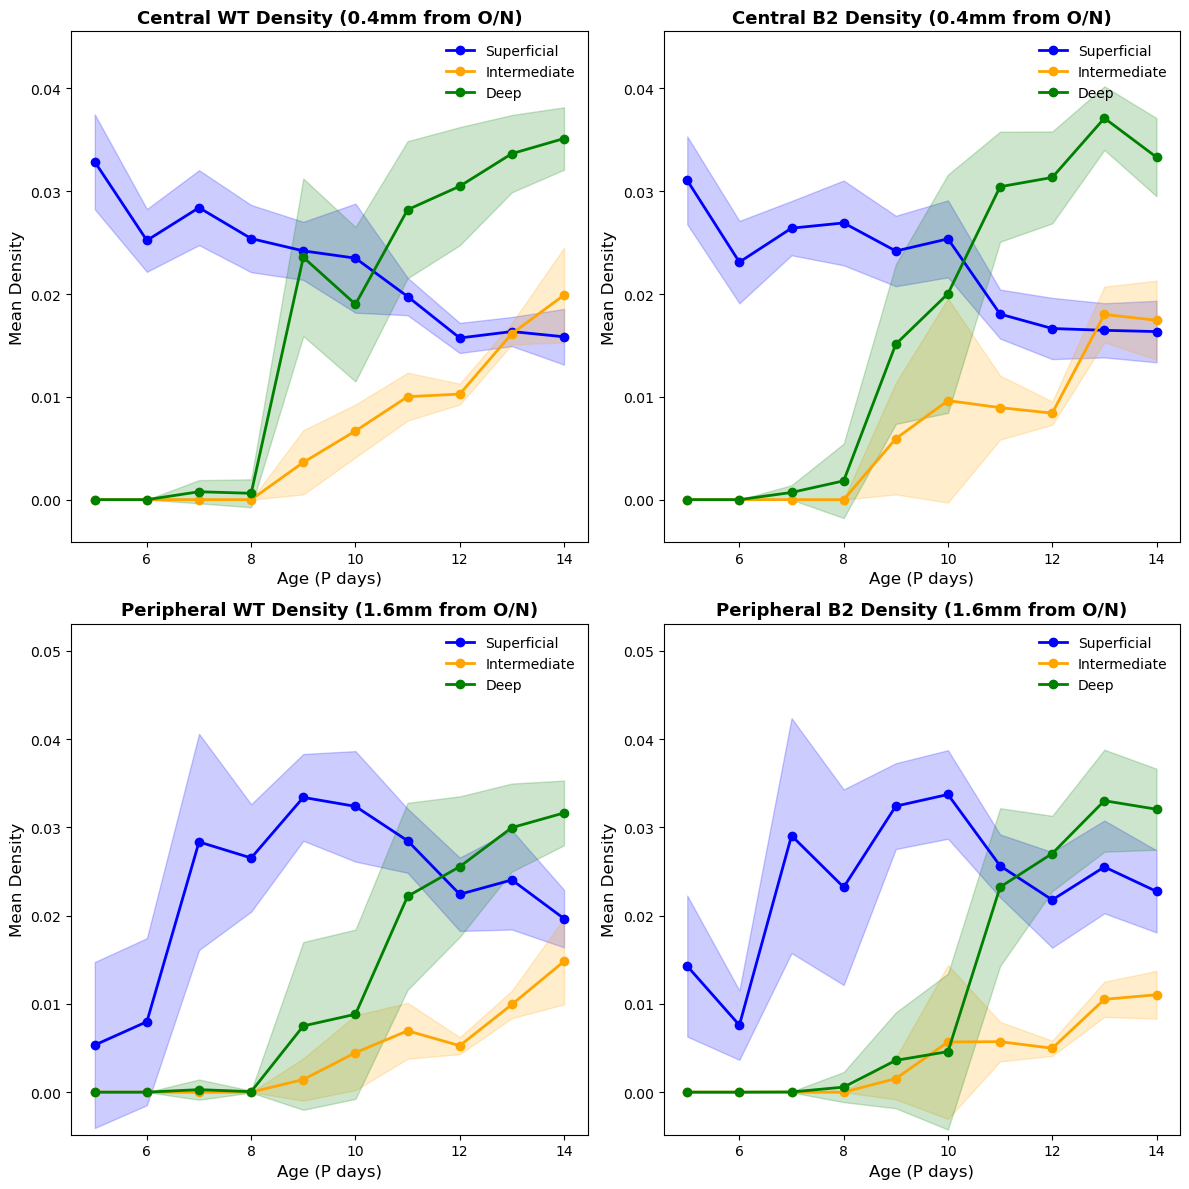

Figure saved to: ../data/central_peripheral_by_genotype.png


In [38]:
# Visualize the data: 2x2 layout (Central/Peripheral rows, WT/B2 columns)
# Each plot shows all 3 layers as different colored lines

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Define colors for layers
layer_colors = {
    'Superficial': 'blue',
    'Intermediate': 'orange',
    'Deep': 'green'
}

layers = ['Superficial', 'Intermediate', 'Deep']
genotypes = ['WT', 'B2']

# Calculate global y-axis limits for shared axes
central_min = combined_df['Central'].min()
central_max = combined_df['Central'].max()
peripheral_min = combined_df['Peripheral'].min()
peripheral_max = combined_df['Peripheral'].max()

# Add some padding (10%) to the limits
central_padding = (central_max - central_min) * 0.1
peripheral_padding = (peripheral_max - peripheral_min) * 0.1

# Plot Central WT (top left)
for layer in layers:
    data = combined_df[(combined_df['Genotype'] == 'WT') & (combined_df['Layer'] == layer)]
    age_stats = data.groupby('Age')['Central'].agg(['mean', 'std']).reset_index()
    ages = age_stats['Age'].values
    means = age_stats['mean'].values
    stds = age_stats['std'].fillna(0).values
    
    axes[0, 0].plot(ages, means, '-o', label=layer, 
                   color=layer_colors[layer], linewidth=2, markersize=6)
    axes[0, 0].fill_between(ages, means - stds, means + stds, 
                           alpha=0.2, color=layer_colors[layer])

axes[0, 0].set_xlabel('Age (P days)', fontsize=12)
axes[0, 0].set_ylabel('Mean Density', fontsize=12)
axes[0, 0].set_title('Central WT Density (0.4mm from O/N)', fontsize=13, fontweight='bold')
axes[0, 0].legend(loc='upper right', frameon=False)
axes[0, 0].set_ylim(central_min - central_padding, central_max + central_padding)

# Plot Central B2 (top right)
for layer in layers:
    data = combined_df[(combined_df['Genotype'] == 'B2') & (combined_df['Layer'] == layer)]
    age_stats = data.groupby('Age')['Central'].agg(['mean', 'std']).reset_index()
    ages = age_stats['Age'].values
    means = age_stats['mean'].values
    stds = age_stats['std'].fillna(0).values
    
    axes[0, 1].plot(ages, means, '-o', label=layer, 
                   color=layer_colors[layer], linewidth=2, markersize=6)
    axes[0, 1].fill_between(ages, means - stds, means + stds, 
                           alpha=0.2, color=layer_colors[layer])

axes[0, 1].set_xlabel('Age (P days)', fontsize=12)
axes[0, 1].set_ylabel('Mean Density', fontsize=12)
axes[0, 1].set_title('Central B2 Density (0.4mm from O/N)', fontsize=13, fontweight='bold')
axes[0, 1].legend(loc='upper right', frameon=False)
axes[0, 1].set_ylim(central_min - central_padding, central_max + central_padding)

# Plot Peripheral WT (bottom left)
for layer in layers:
    data = combined_df[(combined_df['Genotype'] == 'WT') & (combined_df['Layer'] == layer)]
    age_stats = data.groupby('Age')['Peripheral'].agg(['mean', 'std']).reset_index()
    ages = age_stats['Age'].values
    means = age_stats['mean'].values
    stds = age_stats['std'].fillna(0).values
    
    axes[1, 0].plot(ages, means, '-o', label=layer, 
                   color=layer_colors[layer], linewidth=2, markersize=6)
    axes[1, 0].fill_between(ages, means - stds, means + stds, 
                           alpha=0.2, color=layer_colors[layer])

axes[1, 0].set_xlabel('Age (P days)', fontsize=12)
axes[1, 0].set_ylabel('Mean Density', fontsize=12)
axes[1, 0].set_title('Peripheral WT Density (1.6mm from O/N)', fontsize=13, fontweight='bold')
axes[1, 0].legend(loc='upper right', frameon=False)
axes[1, 0].set_ylim(peripheral_min - peripheral_padding, peripheral_max + peripheral_padding)

# Plot Peripheral B2 (bottom right)
for layer in layers:
    data = combined_df[(combined_df['Genotype'] == 'B2') & (combined_df['Layer'] == layer)]
    age_stats = data.groupby('Age')['Peripheral'].agg(['mean', 'std']).reset_index()
    ages = age_stats['Age'].values
    means = age_stats['mean'].values
    stds = age_stats['std'].fillna(0).values
    
    axes[1, 1].plot(ages, means, '-o', label=layer, 
                   color=layer_colors[layer], linewidth=2, markersize=6)
    axes[1, 1].fill_between(ages, means - stds, means + stds, 
                           alpha=0.2, color=layer_colors[layer])

axes[1, 1].set_xlabel('Age (P days)', fontsize=12)
axes[1, 1].set_ylabel('Mean Density', fontsize=12)
axes[1, 1].set_title('Peripheral B2 Density (1.6mm from O/N)', fontsize=13, fontweight='bold')
axes[1, 1].legend(loc='upper right', frameon=False)
axes[1, 1].set_ylim(peripheral_min - peripheral_padding, peripheral_max + peripheral_padding)

plt.tight_layout()
plt.savefig('../data/central_peripheral_by_genotype.png', dpi=300, bbox_inches='tight')
plt.show()
print("Figure saved to: ../data/central_peripheral_by_genotype.png")
